KNN FUZZY STRUCTURE![Screenshot 1403-02-25 at 06.08.38.png](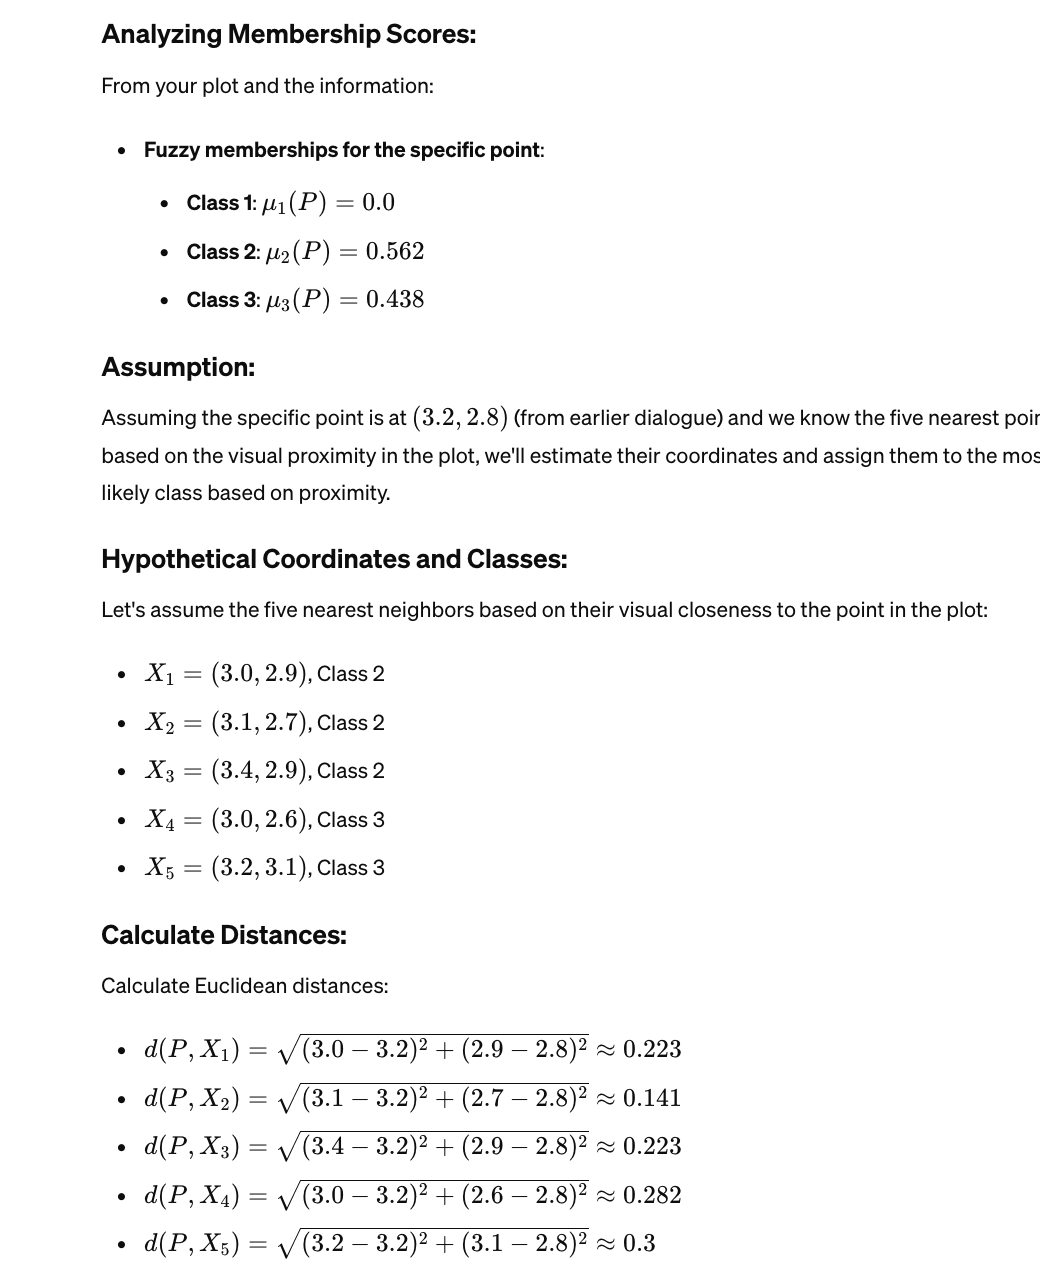![Screenshot 1403-02-25 at 06.08.45.png](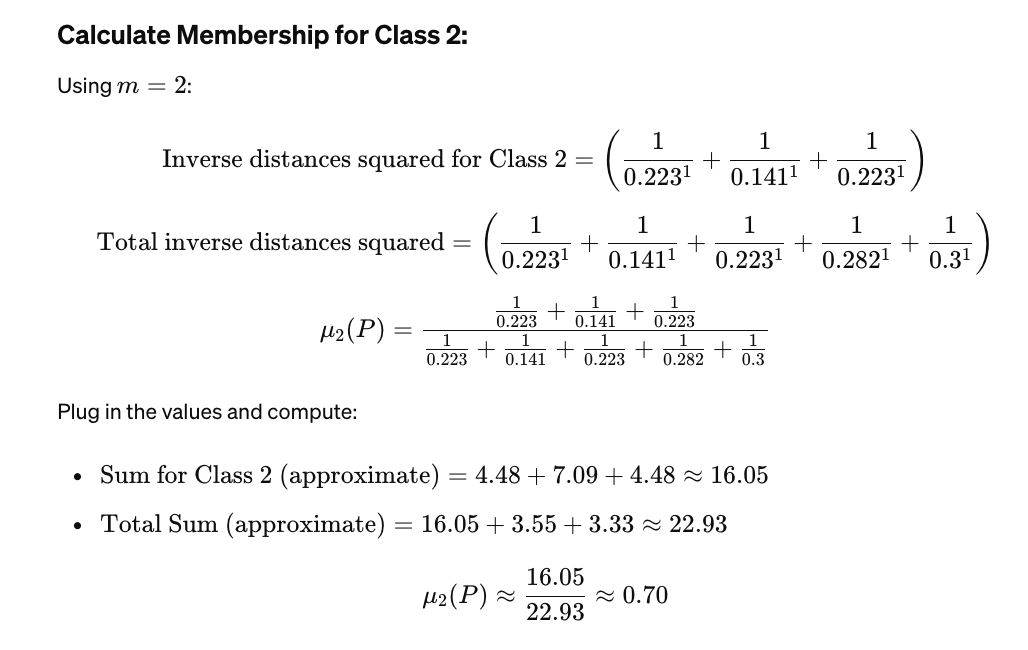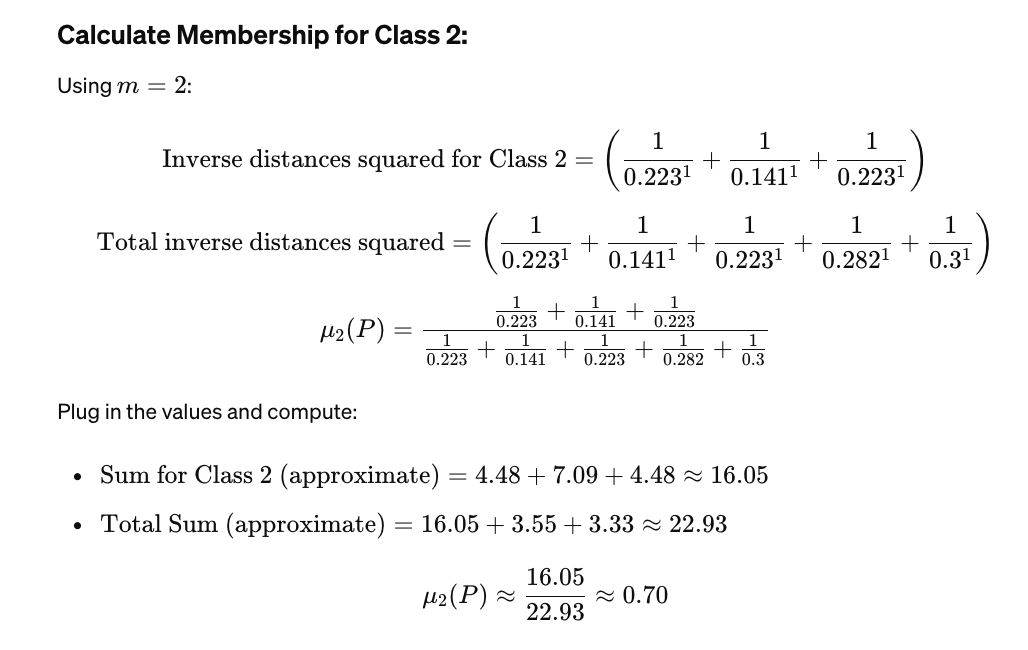))

![SIAVASH.jpg](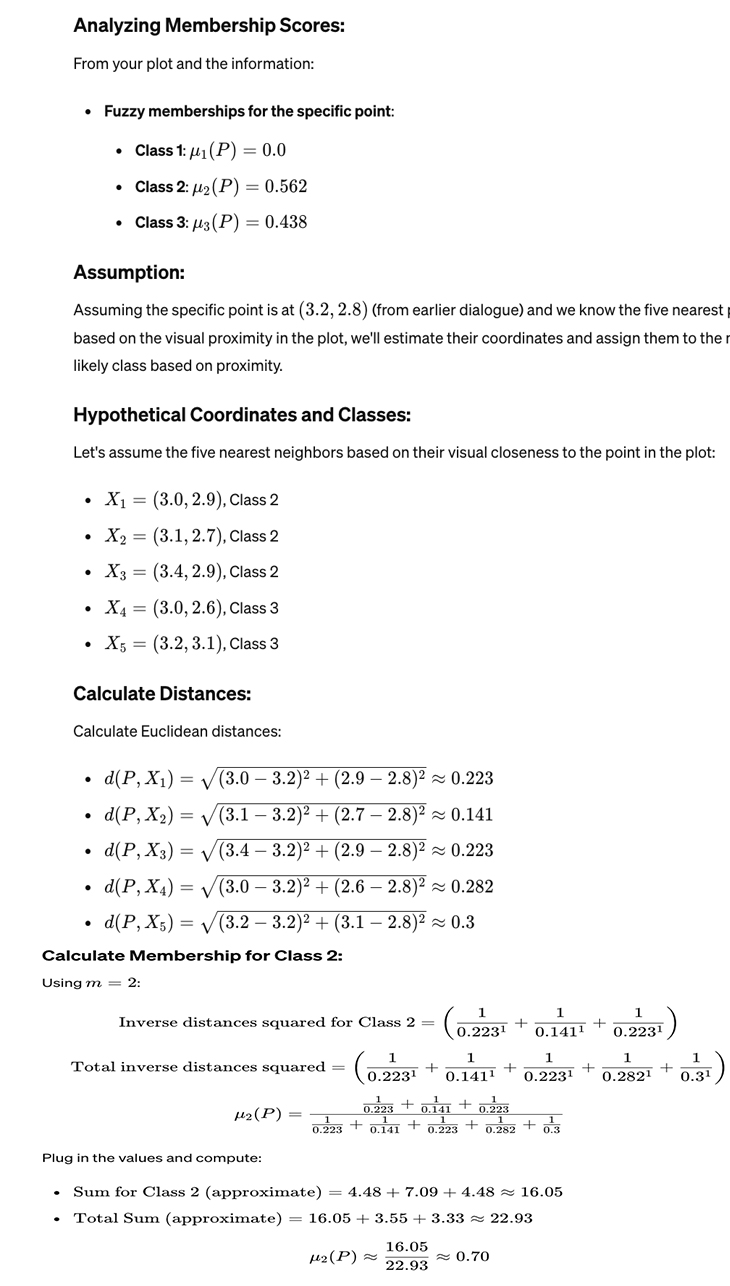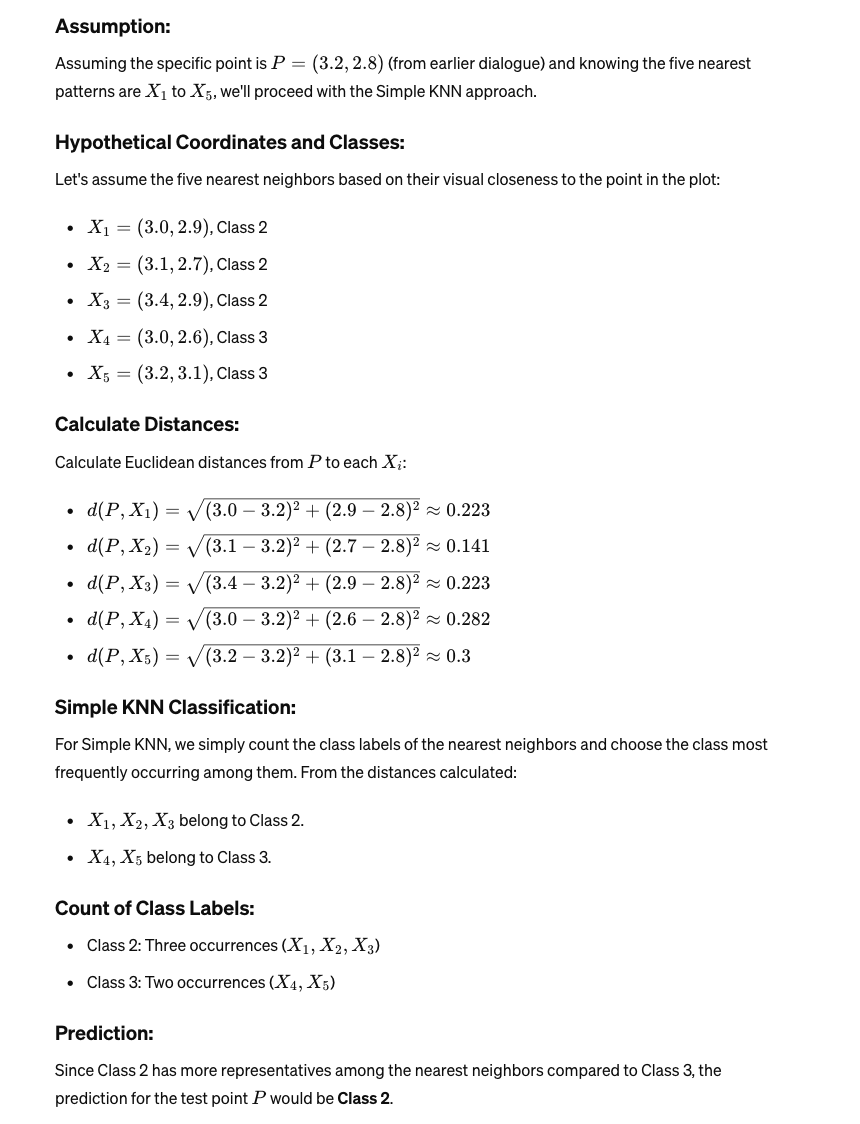)

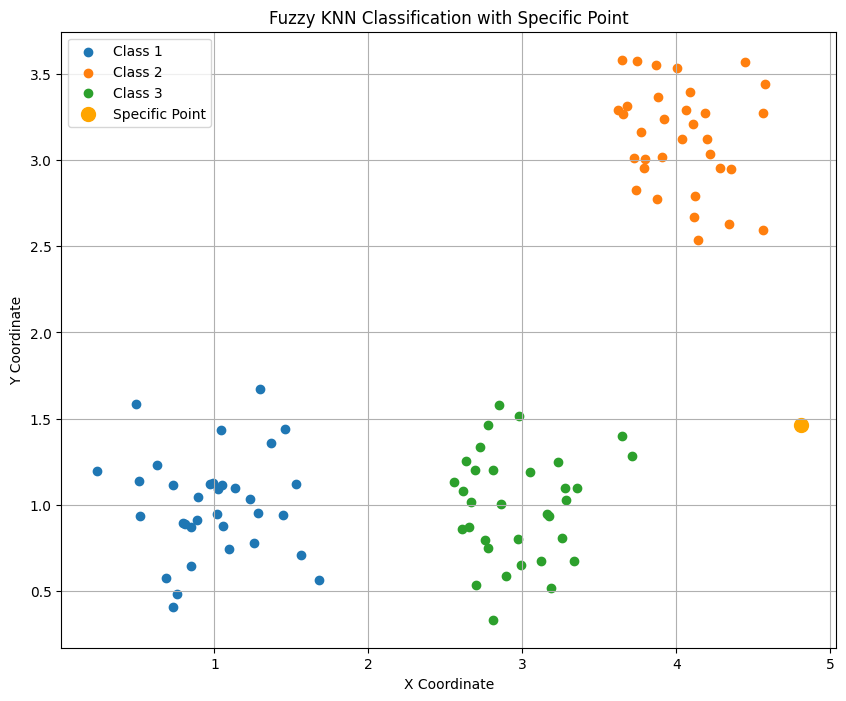

Fuzzy memberships for the specific point: {1.0: 0.0, 2.0: 0.5620091862705336, 3.0: 0.4379908137294664}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 fixed data points across three classes
np.random.seed(0)  # Ensure reproducibility
data_class_1 = np.random.normal([1, 1], 0.3, (34, 2))  # 34 points around (1,1)
data_class_2 = np.random.normal([4, 3], 0.3, (33, 2))  # 33 points around (4,3)
data_class_3 = np.random.normal([3, 1], 0.3, (33, 2))  # 33 points around (3,1)
classes = np.array([1]*34 + [2]*33 + [3]*33)
data = np.vstack((data_class_1, data_class_2, data_class_3))
all_data = np.column_stack((data, classes))

# Define the Fuzzy KNN function
def fuzzy_knn(data, test_point, k=5, m=2):
    distances = np.sqrt(((data[:, :2] - test_point) ** 2).sum(axis=1))
    nearest_indices = np.argsort(distances)[:k]
    nearest_distances = distances[nearest_indices]
    nearest_classes = data[nearest_indices, 2]
    unique_classes = np.unique(data[:, 2])
    memberships = {}
    for cl in unique_classes:
        class_indices = nearest_classes == cl
        class_distances = nearest_distances[class_indices]
        numerator = np.sum(1 / class_distances ** (2 / (m - 1)))
        denominator = np.sum(1 / nearest_distances ** (2 / (m - 1)))
        memberships[cl] = numerator / denominator if denominator != 0 else 0
    return memberships

# Randomly generate a specific point
specific_point = np.random.uniform(low=[0, 0], high=[5, 5], size=2)
memberships = fuzzy_knn(all_data, specific_point, k=5, m=2)

# Plotting
plt.figure(figsize=(10, 8))
for cl in np.unique(all_data[:, 2]):
    class_mask = all_data[:, 2] == cl
    plt.scatter(all_data[class_mask, 0], all_data[class_mask, 1], label=f'Class {int(cl)}')
plt.scatter(specific_point[0], specific_point[1], color='orange', s=100, label='Specific Point')
plt.title('Fuzzy KNN Classification with Specific Point')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

# Outputting memberships
print("Fuzzy memberships for the specific point:", memberships)


KNN FUZZY SPECIFIC POINT

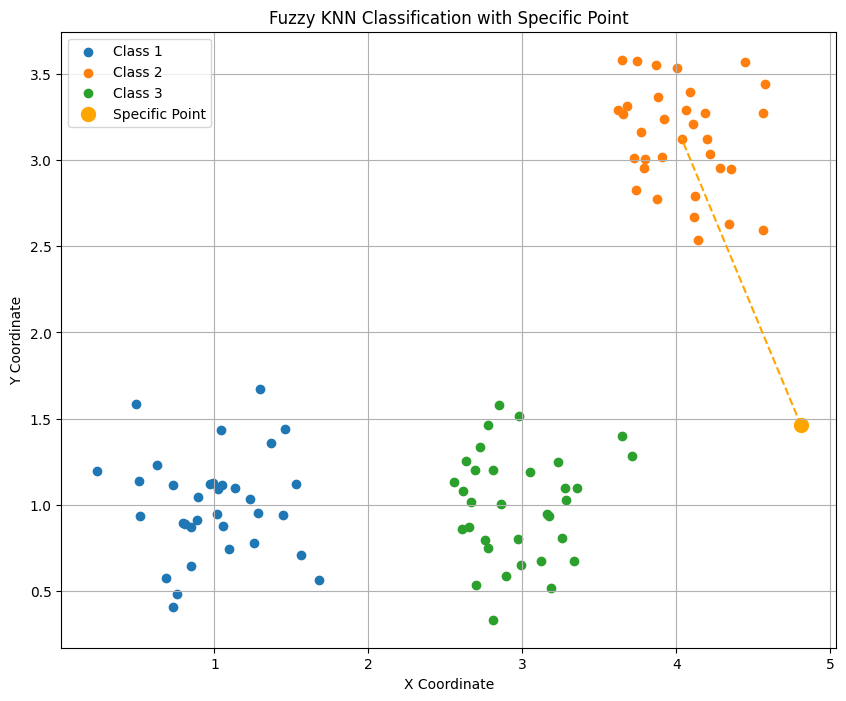

Fuzzy memberships for the specific point: {1.0: 0.0, 2.0: 0.5620091862705336, 3.0: 0.4379908137294664}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(0)

# Generate 100 fixed data points across three classes
data_class_1 = np.random.normal([1, 1], 0.3, (34, 2))  # 34 points around (1, 1) for Class 1
data_class_2 = np.random.normal([4, 3], 0.3, (33, 2))  # 33 points around (4, 3) for Class 2
data_class_3 = np.random.normal([3, 1], 0.3, (33, 2))  # 33 points around (3, 1) for Class 3

# Assemble the classes and data into a single array
classes = np.array([1]*34 + [2]*33 + [3]*33)
data = np.vstack((data_class_1, data_class_2, data_class_3))
all_data = np.column_stack((data, classes))

# Define the Fuzzy KNN function
def fuzzy_knn(data, test_point, k=5, m=2):
    # Compute Euclidean distances from the test point to all data points
    distances = np.sqrt(((data[:, :2] - test_point) ** 2).sum(axis=1))
    # Get the indices of the k smallest distances
    nearest_indices = np.argsort(distances)[:k]
    nearest_distances = distances[nearest_indices]
    nearest_classes = data[nearest_indices, 2]

    # Compute fuzzy memberships
    memberships = {}
    for cl in np.unique(data[:, 2]):
        class_indices = nearest_classes == cl
        class_distances = nearest_distances[class_indices]
        numerator = np.sum(1 / class_distances ** (2 / (m - 1)))
        denominator = np.sum(1 / nearest_distances ** (2 / (m - 1)))
        memberships[cl] = numerator / denominator if denominator != 0 else 0
    return memberships

# Randomly generate a specific point within the overall range
specific_point = np.random.uniform(low=[0, 0], high=[5, 5], size=2)
memberships = fuzzy_knn(all_data, specific_point, k=5, m=2)

# Determine which class has the highest membership value
predicted_class = max(memberships, key=memberships.get)
class_center = np.mean(all_data[all_data[:, 2] == predicted_class, :2], axis=0)

# Plotting
plt.figure(figsize=(10, 8))
for cl in np.unique(all_data[:, 2]):
    class_mask = all_data[:, 2] == cl
    plt.scatter(all_data[class_mask, 0], all_data[class_mask, 1], label=f'Class {int(cl)}')

# Highlight the specific point
plt.scatter(specific_point[0], specific_point[1], color='orange', s=100, label='Specific Point')

# Draw a line from the specific point to the center of its most likely class
plt.plot([specific_point[0], class_center[0]], [specific_point[1], class_center[1]], 'orange', linestyle='--')

plt.title('Fuzzy KNN Classification with Specific Point')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

# Outputting memberships
print("Fuzzy memberships for the specific point:", memberships)


RANDOMLY

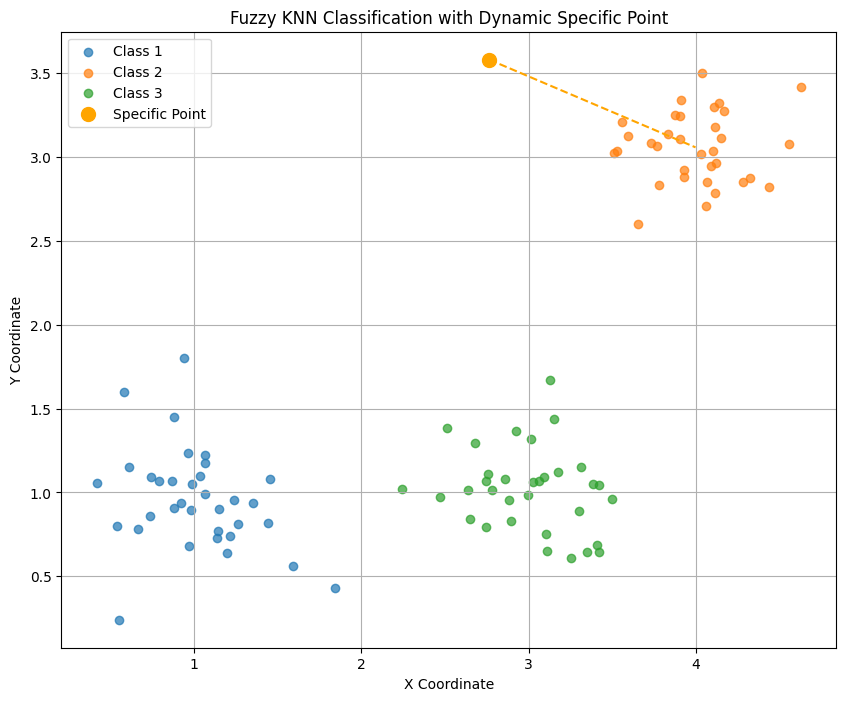

Fuzzy memberships for the specific point: {1.0: 0.0, 2.0: 1.0, 3.0: 0.0}


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 fixed data points across three classes
data_class_1 = np.random.normal([1, 1], 0.3, (34, 2))  # Class 1 centered around (1, 1)
data_class_2 = np.random.normal([4, 3], 0.3, (33, 2))  # Class 2 centered around (4, 3)
data_class_3 = np.random.normal([3, 1], 0.3, (33, 2))  # Class 3 centered around (3, 1)

# Assemble the classes and data into a single array
classes = np.array([1]*34 + [2]*33 + [3]*33)
data = np.vstack((data_class_1, data_class_2, data_class_3))
all_data = np.column_stack((data, classes))

# Define the Fuzzy KNN function to calculate membership scores
def fuzzy_knn(data, test_point, k=5, m=2):
    # Calculate Euclidean distances from the test point to all data points
    distances = np.sqrt(((data[:, :2] - test_point) ** 2).sum(axis=1))
    # Get the indices of the k nearest neighbors
    nearest_indices = np.argsort(distances)[:k]
    nearest_distances = distances[nearest_indices]
    nearest_classes = data[nearest_indices, 2]

    # Calculate fuzzy memberships using the distances to the nearest neighbors
    memberships = {}
    for cl in np.unique(data[:, 2]):
        class_indices = nearest_classes == cl
        class_distances = nearest_distances[class_indices]
        numerator = np.sum(1 / class_distances ** (2 / (m - 1)))
        denominator = np.sum(1 / nearest_distances ** (2 / (m - 1)))
        memberships[cl] = numerator / denominator if denominator != 0 else 0
    return memberships

# Randomly generate a specific point within the overall range every time the code runs
specific_point = np.random.uniform(low=[0, 0], high=[5, 5], size=2)
memberships = fuzzy_knn(all_data, specific_point, k=5, m=2)

# Determine which class has the highest membership value
predicted_class = max(memberships, key=memberships.get)
class_center = np.mean(all_data[all_data[:, 2] == predicted_class, :2], axis=0)

# Plotting
plt.figure(figsize=(10, 8))
for cl in np.unique(all_data[:, 2]):
    class_mask = all_data[:, 2] == cl
    plt.scatter(all_data[class_mask, 0], all_data[class_mask, 1], label=f'Class {int(cl)}', alpha=0.7)

# Highlight the specific point and draw a line to its predicted class center
plt.scatter(specific_point[0], specific_point[1], color='orange', s=100, label='Specific Point')
plt.plot([specific_point[0], class_center[0]], [specific_point[1], class_center[1]], 'orange', linestyle='--')

plt.title('Fuzzy KNN Classification with Dynamic Specific Point')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

# Output the fuzzy membership scores for the specific point
print("Fuzzy memberships for the specific point:", memberships)


simple knn(not fuzzy)

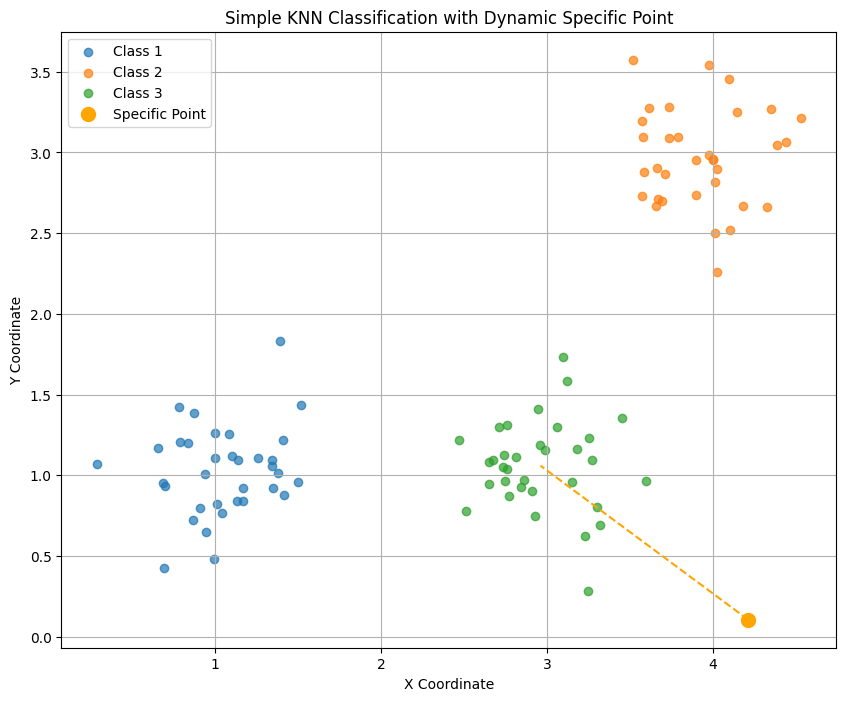

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 fixed data points across three classes
data_class_1 = np.random.normal([1, 1], 0.3, (34, 2))  # Class 1 centered around (1, 1)
data_class_2 = np.random.normal([4, 3], 0.3, (33, 2))  # Class 2 centered around (4, 3)
data_class_3 = np.random.normal([3, 1], 0.3, (33, 2))  # Class 3 centered around (3, 1)

# Assemble the classes and data into a single array
classes = np.array([1]*34 + [2]*33 + [3]*33)
data = np.vstack((data_class_1, data_class_2, data_class_3))
all_data = np.column_stack((data, classes))

# Define a simple KNN function to predict the class based on majority vote
def simple_knn(data, test_point, k=5):
    # Calculate Euclidean distances from the test point to all data points
    distances = np.sqrt(((data[:, :2] - test_point) ** 2).sum(axis=1))
    # Get the indices of the k nearest neighbors
    nearest_indices = np.argsort(distances)[:k]
    nearest_classes = data[nearest_indices, 2]

    # Determine the most frequent class among the nearest neighbors
    predicted_class = np.bincount(nearest_classes.astype(int)).argmax()
    return predicted_class

# Randomly generate a specific point within the overall range every time the code runs
specific_point = np.random.uniform(low=[0, 0], high=[5, 5], size=2)
predicted_class = simple_knn(all_data, specific_point, k=5)

# Determine the center of the predicted class
class_center = np.mean(all_data[all_data[:, 2] == predicted_class, :2], axis=0)

# Plotting
plt.figure(figsize=(10, 8))
for cl in np.unique(all_data[:, 2]):
    class_mask = all_data[:, 2] == cl
    plt.scatter(all_data[class_mask, 0], all_data[class_mask, 1], label=f'Class {int(cl)}', alpha=0.7)

# Highlight the specific point and draw a line to its predicted class center
plt.scatter(specific_point[0], specific_point[1], color='orange', s=100, label='Specific Point')
plt.plot([specific_point[0], class_center[0]], [specific_point[1], class_center[1]], 'orange', linestyle='--')

plt.title('Simple KNN Classification with Dynamic Specific Point')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()
